# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        

City processed: anadyr
City processed: vernal
City processed: sola
City processed: port-aux-francais
City NOT found: taiohae
City processed: wailua homesteads
City processed: edinburgh of the seven seas
City processed: ribeira grande
City processed: arraial do cabo
City processed: flin flon
City processed: vorkuta
City processed: port macquarie
City processed: xai-xai
City processed: iqaluit
City processed: touros
City processed: waitangi
City processed: labin
City processed: albany
City processed: al jahra'
City processed: port mathurin
City processed: sihanoukville
City processed: whitehorse
City processed: tukrah
City processed: adamstown
City processed: puerto ayora
City processed: tiksi
City processed: remire-montjoly
City processed: iskateley
City processed: papatowai
City processed: manokwari
City processed: selfoss
City processed: utrik
City NOT found: tranovaho
City processed: sisimiut
City processed: grytviken
City processed: likasi
City processed: novodvinsk
City processed: 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [7]:
# Convert the cities weather data into a Pandas DataFrame
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [18]:
# Display sample data
Weather_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,anadyr,RU,37.90,75,40,8.95,64.7500,177.4833,1717595471
1,vernal,US,63.66,50,0,0.00,40.4555,-109.5287,1717595208
2,sola,VU,79.92,67,100,19.62,-13.8833,167.5500,1717595471
3,port-aux-francais,TF,35.92,81,71,47.89,-49.3500,70.2167,1717595471
4,wailua homesteads,US,74.19,88,0,10.36,22.0669,-159.3780,1717595471


In [9]:
# Export the City_Data into a csv
Weather_DF.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
Weather_DF = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
Weather_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,anadyr,RU,37.90,75,40,8.95,64.7500,177.4833,1717595471
1,vernal,US,63.66,50,0,0.00,40.4555,-109.5287,1717595208
2,sola,VU,79.92,67,100,19.62,-13.8833,167.5500,1717595471
3,port-aux-francais,TF,35.92,81,71,47.89,-49.3500,70.2167,1717595471
4,wailua homesteads,US,74.19,88,0,10.36,22.0669,-159.3780,1717595471


In [14]:
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv("output_data/cities.csv", index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
City_ID,,,,,,,,
0,anadyr,RU,64.7500,37.90,75,40,8.95,1717595471
1,vernal,US,40.4555,63.66,50,0,0.00,1717595208
2,sola,VU,-13.8833,79.92,67,100,19.62,1717595471
3,port-aux-francais,TF,-49.3500,35.92,81,71,47.89,1717595471
4,wailua homesteads,US,22.0669,74.19,88,0,10.36,1717595471


In [20]:
from datetime import datetime

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

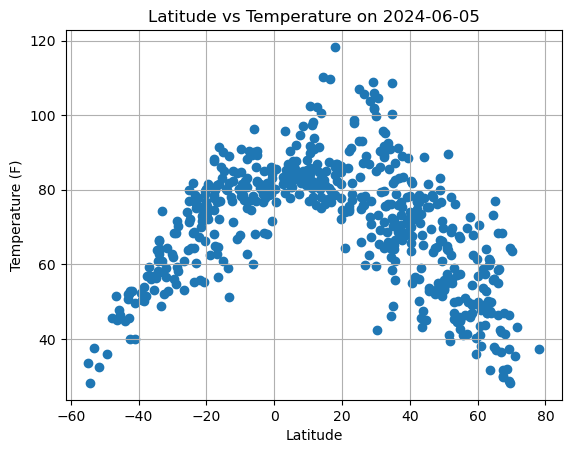

In [21]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

#### Latitude Vs. Humidity

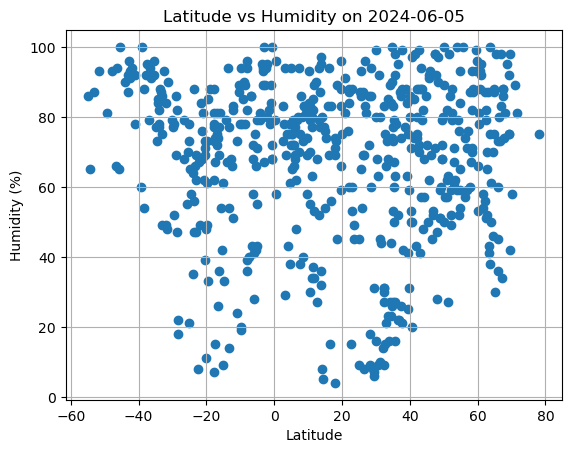

In [22]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

#### Latitude Vs. Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

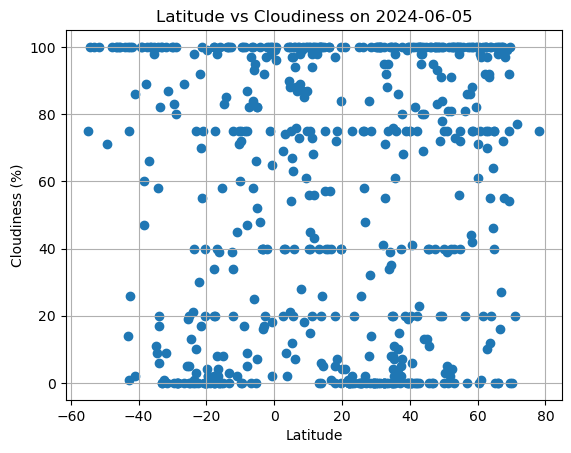

In [23]:
# Build the scatter plots for latitude vs. cloudiness
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

#### Latitude vs. Wind Speed Plot

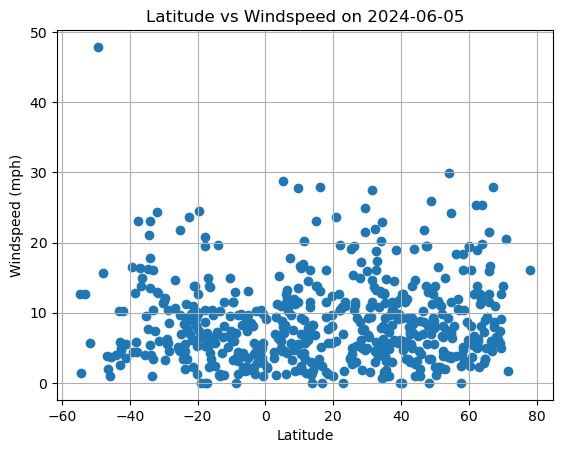

In [24]:
# Build the scatter plots for latitude vs. wind speed
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]

# Display sample data
Northern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
0,anadyr,RU,37.90,75,40,8.95,64.7500,177.4833,1717595471
1,vernal,US,63.66,50,0,0.00,40.4555,-109.5287,1717595208
4,wailua homesteads,US,74.19,88,0,10.36,22.0669,-159.3780,1717595471
6,ribeira grande,PT,68.40,77,20,18.99,38.5167,-28.7000,1717595472
8,flin flon,CA,42.64,93,100,11.50,54.7682,-101.8650,1717595472


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]
# Display sample data
Southern_DF.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
City_ID,,,,,,,,,
2,sola,VU,79.92,67,100,19.62,-13.8833,167.5500,1717595471
3,port-aux-francais,TF,35.92,81,71,47.89,-49.3500,70.2167,1717595471
5,edinburgh of the seven seas,SH,59.18,79,66,16.35,-37.0676,-12.3116,1717595471
7,arraial do cabo,BR,75.06,69,75,3.44,-22.9661,-42.0278,1717595358
10,port macquarie,AU,52.90,90,87,5.99,-31.4333,152.9167,1717595472


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.7430945649337082
y = -0.66x + 94.74


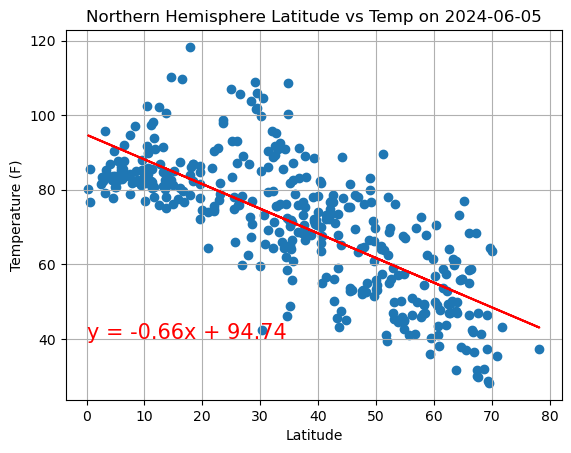

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

The r-square is 0.8231251997849248
y = 0.85x + 87.18


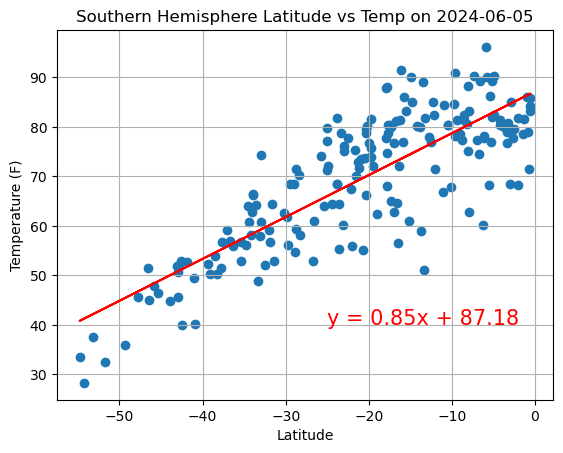

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# * Northern Hemisphere: This correlation coefficient suggests a fairly strong negative correlation between temperature and latitude. 
    This means that as you move further away from the equator (towards higher latitudes) in the Northern Hemisphere, temperatures tend to decrease.

#  * Southern Hemisphere: This correlation coefficient indicates a relatively strong positive correlation between temperature and latitude in the 
    Southern Hemisphere. This suggests that as you move closer to the equator (towards lower latitudes) 
    in the Southern Hemisphere, temperatures tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.07969699656236888
y = 0.09x + 63.43


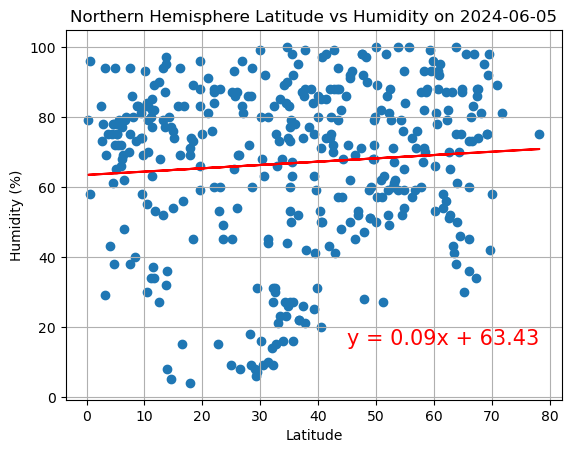

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is -0.17370639943779426
y = -0.28x + 64.07


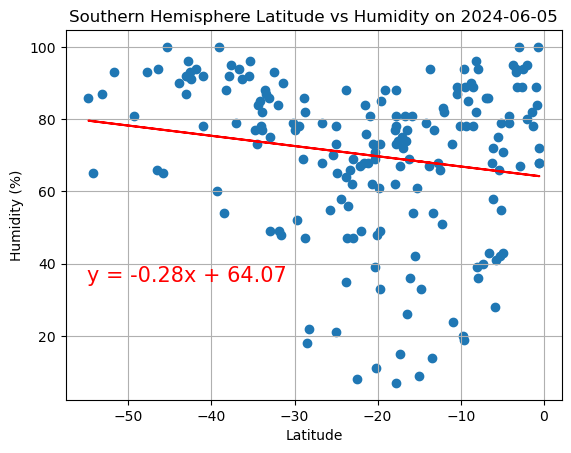

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# * These correlation coefficients indicate the relationship between humidity and latitude in the Northern and Southern Hemispheres:
    Southern Hemisphere: A correlation coefficient of 0.5440 also indicates a relatively strong positive correlation between humidity 
    and latitude in the Southern Hemisphere. This suggests that as you move closer to the equator (towards lower latitudes) 
    in the Southern Hemisphere, humidity tends to increase.
# * Northern Hemisphere: This correlation coefficient suggests a relatively strong positive correlation between humidity and latitude. 
    This means that as you move further away from the equator (towards higher latitudes) in the Northern Hemisphere, humidity tends to increase.
# * These relationships are influenced by various factors such as air circulation patterns, proximity to bodies of water, and temperature gradients, 
    which affect the amount of moisture in the atmosphere at different latitudes.



### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.06276089900368079
y = 0.13x + 52.65


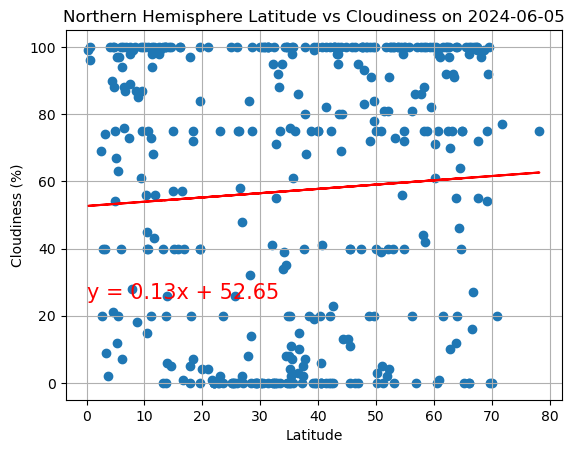

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

The r-square is -0.10730933351862473
y = -0.33x + 43.27


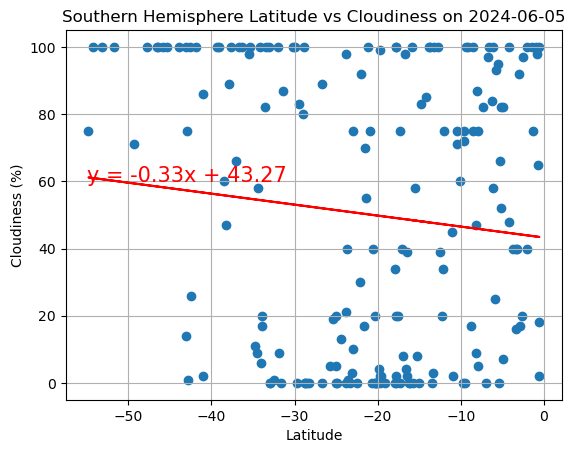

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# * Southern Hemisphere: A correlation coefficient of 0.4749 suggests a relatively strong positive correlation between cloudiness and latitude in the 
    Southern Hemisphere. This means that as you move towards the equator (towards lower latitudes) in the Southern Hemisphere, 
    there is a notable tendency for cloudiness to increase
# * Northern Hemisphere: A correlation coefficient of 0.3077 indicates a weak positive correlation between cloudiness and latitude. 
    This means that as you move away from the equator (towards higher latitudes) in the Northern Hemisphere, there is a slight tendency 
    for cloudiness to increase.



### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.0596888380915725
y = 0.02x + 8.21


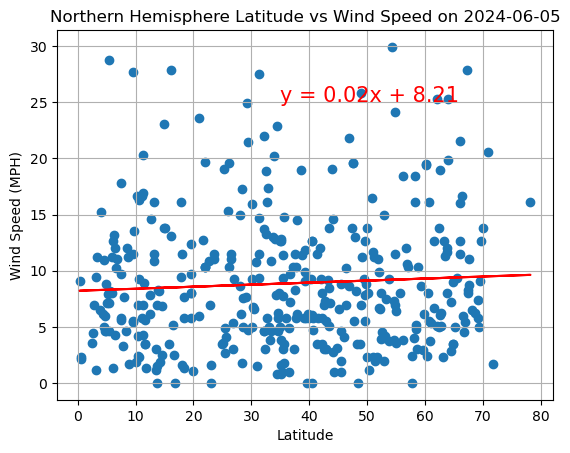

In [34]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

The r-square is -0.24885623664149148
y = -0.11x + 5.71


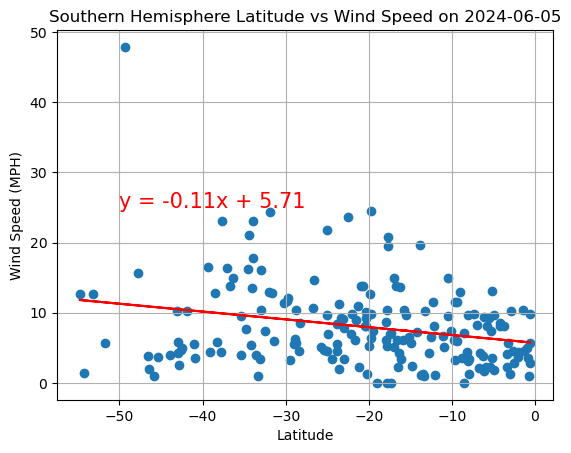

In [35]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# * Northern Hemisphere: With a correlation coefficient of 0.2151, there is a negligible to almost no correlation between wind speed and latitude. 
   This suggests that there is little systematic relationship between wind speed and latitude in the Northern Hemisphere.

# * Southern Hemisphere: The correlation coefficient of -0.3375 indicates a weak negative correlation between wind speed and latitude 
    in the Southern Hemisphere. This means that as you move closer to the equator (towards lower latitudes) in the Southern Hemisphere, 
    there is a slight tendency for wind speed to decrease.

# These relationships may be influenced by various factors such as global wind patterns, local topography, and temperature gradients, which 
can affect wind speed differently across latitudes.